In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import sys
import os
sys.path.append('/Users/taozhou/Documents/GitHub/muB_oscillation')
from MicroTools import *
from MicroTools.plot_tools import *

In [4]:
MuBAppDisT0 = np.load(f"{path_osc_data}/App_gm4_Um4sq.npy", allow_pickle=True)
MuBAppDisT0_new = np.load(f"{path_osc_data}/App_gm4_Um4sq_migrated_1.npy", allow_pickle=True)
PVs = np.load(f"{path_osc_data}/gm4_Um4sq_PVs.npy", allow_pickle=True)
gm4VecT = PVs[0]
MVec = PVs[1]

MuBAppDisT = (np.asarray(MuBAppDisT0.T[0])).reshape(len(gm4VecT), len(MVec))
MuBAppDisTAs = (np.asarray(MuBAppDisT0.T[1])).reshape(len(gm4VecT), len(MVec))

MuBAppDisT_new = (np.asarray(MuBAppDisT0_new.T[0])).reshape(len(gm4VecT), len(MVec))
MuBAppDisTAs_new = (np.asarray(MuBAppDisT0_new.T[1])).reshape(len(gm4VecT), len(MVec))

In [5]:
MB = np.loadtxt('/Users/taozhou/Documents/GitHub/muB_oscillation/MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]
MBlower = np.loadtxt('/Users/taozhou/Documents/GitHub/muB_oscillation/MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_lower.dat')
MBupper = np.loadtxt('/Users/taozhou/Documents/GitHub/muB_oscillation/MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_upper.dat')
MBc = np.vstack((MBlower,MBupper))
print(MBc)

[[-3.3021233   1.98032467]
 [-3.30195923  1.95932262]
 [-3.30188201  1.94943931]
 ...
 [-0.05112065 -0.50273602]
 [-0.04787769 -0.4953171 ]
 [-0.03457768 -0.50764551]]


92.65762086182028


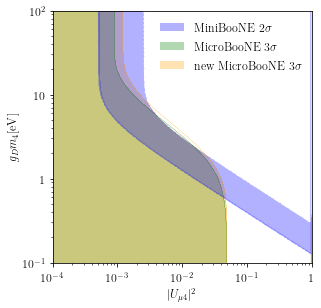

In [7]:
from MicroTools.plot_tools import *

# Load 95% contour from Miniboone.
MB = np.loadtxt('/Users/taozhou/Documents/GitHub/muB_oscillation/MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]

fig, ax = std_fig(figsize=(std_figsize[0], std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-1, 1e2
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_ylabel(r'$g_D m_4 [\mathrm{eV}]$', fontproperties=font)        
ax.xaxis.set_major_locator(FixedLocator((1e-4, 1e-3, 1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-1, 1, 10, 100)))
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=labelfont)
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=labelfont)
ax.set_xlabel(r"$|U_{\mu 4}|^2$", fontproperties=font)        


levs0MB = np.min(MuBAppDisT)
levs0MB_new = np.min(MuBAppDisT_new)
print(levs0MB)
#levsMB = [levs0MB, levs0MB + 2.30, levs0MB + 6.18, levs0MB + 11.83]
levsMB = [levs0MB, levs0MB + 11.83]
levsMB_new = [levs0MB_new, levs0MB_new + 11.83]
#ax.contourf(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=0.3)
#ax.contour(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=1, linewidths=0.25)
ax.contourf(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['green','green'], alpha=0.3)
ax.contour(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['green','green'], alpha=1, linewidths=0.25)
ax.contourf(MVec, gm4VecT, MuBAppDisT_new, levels=levsMB_new, colors=['orange','orange'], alpha=0.3)
ax.contour(MVec, gm4VecT, MuBAppDisT_new, levels=levsMB_new, colors=['orange','orange'], alpha=1, linewidths=0.25)
#ax.fill(MBX,MBY,color='Black',alpha=0.5)

ax.fill_between(x=10**MBlower[:,0],y1=10**MBlower[:,1],y2=100,color='blue', alpha=.3)
ax.fill_between(x=10**MBupper[:,0],y1=10**MBupper[:,1],y2=100,color='white')

#plt.Rectangle((0.1,0.1),0.8,0.8,fc = 'blue', alpha = .3, label=r'MiniBooNE $2\sigma$'),

legend_elements = [
    plt.Rectangle((0.1,0.1),0.8,0.8,fc = 'blue', alpha = .3, label=r'MiniBooNE $2\sigma$'),
    plt.Rectangle((0.1,0.1),0.8,0.8,fc = 'green', alpha = .3, label=r'MicroBooNE $3\sigma$'),
    plt.Rectangle((0.1,0.1),0.8,0.8,fc = 'orange', alpha = .3, label=r'new MicroBooNE $3\sigma$')]
ax.legend(handles = legend_elements, loc = 'upper right', fontsize = 12)

fig.savefig(f"{path_plots}/gm4_Um4sq_compare_migrated.pdf", bbox_inches='tight')